In [116]:
#importing libraries
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [117]:
#Creating a new dataframe
df = pdr.get_data_tiingo('DAL', api_key = 'ef99e4dc19153f1f55a9228a74d5ceb8d8c4fe55')

In [118]:
#coverting the csv
df.to_csv('AAPL.csv')

In [119]:
#creating a new df
df1 = df.reset_index()['close']

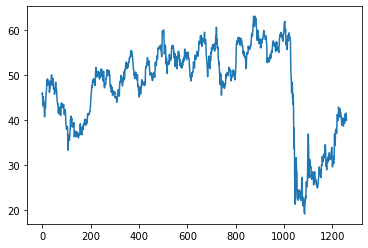

In [120]:
#Plotting the df
plt.plot(df1)

In [121]:
#Normalizing the data using MinMaxScaler (making all the values between 0 and 1)
scalar = MinMaxScaler(feature_range = (0,1))
df1 = scalar.fit_transform(np.array(df1).reshape(-1,1))

In [122]:
#Checking the shapre of the df
df1.shape

(1259, 1)

In [123]:
#Preparing the training data using 65% of the data for training
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [124]:
training_size, test_size

(818, 441)

In [125]:
import numpy 
#Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)- time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [126]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [127]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [128]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [129]:
#Reshaping X_train and X_test
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [130]:
#Importing libraries for the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [131]:
#Creating LSTM Model
model = Sequential()

#Layer1
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))

#Layer2
model.add(LSTM(50, return_sequences = True))

#Layer3
model.add(LSTM(50))

#Output Layer
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [132]:
#Summarizing the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Training the model
# Using at least 10 epochs
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, shuffle=False, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 410ms/step - loss: 0.0902 - val_loss: 0.0223
Epoch 2/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0074 - val_loss: 0.0455
Epoch 3/100
12/12 [==============================] - 3s 210ms/step - loss: 0.0194 - val_loss: 0.0304
Epoch 4/100
12/12 [==============================] - 3s 264ms/step - loss: 0.0125 - val_loss: 0.0231
Epoch 5/100
12/12 [==============================] - 3s 260ms/step - loss: 0.0067 - val_loss: 0.0244
Epoch 6/100
12/12 [==============================] - 3s 254ms/step - loss: 0.0086 - val_loss: 0.0218
Epoch 7/100
12/12 [==============================] - 3s 247ms/step - loss: 0.0083 - val_loss: 0.0181
Epoch 8/100
12/12 [==============================] - 3s 243ms/step - loss: 0.0069 - val_loss: 0.0157
Epoch 9/100
12/12 [==============================] - 3s 257ms/step - loss: 0.0060 - val_loss: 0.0141
Epoch 10/100
12/12 [==============================] - 3s 263ms/step - loss: 0.0056 - val_l

In [134]:
#Making some predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

#getting the values of prediction
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

In [135]:
#Importing libraries for evaluating the model
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

49.62503601946489

In [136]:
math.sqrt(mean_squared_error(y_train,train_predict))

49.62503601946489

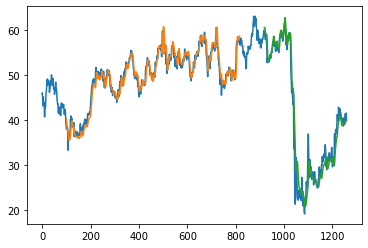

In [137]:
#Plotting and the actual values data as a line chart
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict 
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict 
#plots
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [138]:
len(test_data)

441

In [139]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [140]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [141]:
# demonstrating prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.47651455]
101
1 day input [0.26199682 0.27177621 0.27359563 0.28610416 0.3036161  0.28587673
 0.28655902 0.28451217 0.30998408 0.3256766  0.34978394 0.33591085
 0.31043894 0.24175574 0.25085285 0.23584262 0.22333409 0.24084603
 0.27632477 0.25972254 0.25904025 0.2708665  0.28564931 0.291335
 0.26995679 0.29474642 0.30680009 0.30975665 0.30589038 0.28610416
 0.28587673 0.27632477 0.27928133 0.27996361 0.29088015 0.27996361
 0.33045258 0.33682056 0.28974301 0.26199682 0.23788947 0.26313395
 0.26040482 0.25085285 0.26631794 0.25562884 0.29088015 0.27814419
 0.39981806 0.40595861 0.36001819 0.34546282 0.3927678  0.42779168
 0.41869456 0.42574483 0.42574483 0.40800546 0.44575847 0.50193314
 0.50261542 0.49738458 0.47896293 0.47236752 0.49761201 0.54036843
 0.52695019 0.52672277 0.52808733 0.5212645  0.53286332 0.51284967
 0.48896975 0.51535138 0.49783944 0.49852172 0.48874232 0.47646122
 0.44916989 0.4787355  0.46713668 0.47668865 0.47395952 0.48601319
 0.47805322 0.4443939  0.46304298 0

In [142]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [143]:
import matplotlib.pyplot as plt

In [144]:
len(df1)

1259

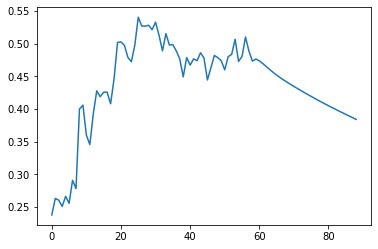

In [151]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

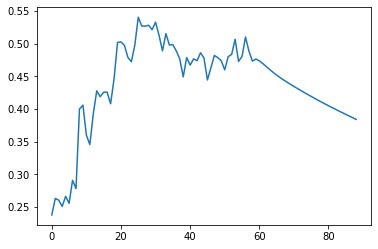

In [153]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

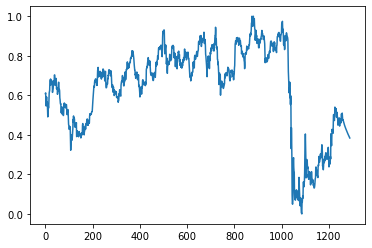

In [154]:
plt.plot(df3)
